In [1]:
import numpy as np
import scipy.integrate as SI
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')    #suppress warnings
plt.rcParams['text.usetex'] = True
from pylab import *
warnings.filterwarnings('ignore')   
from scipy.integrate import odeint
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 20

def SIO_method(f,x,T):
    s = SI.odeint(f,x,T)
    X,U = s[:,0], s[:,1]
    return X,U

## Simple Harmonic Oscillation

$\qquad\displaystyle{\ddot{x}+\omega_0^2 x=0}$

$\qquad\displaystyle{x_{\text{analytic}}=A \cos(\omega_0 t+\phi)}$


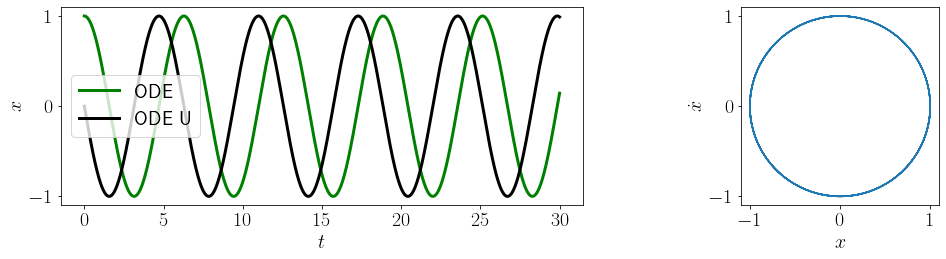

In [2]:
def f(X,t,w0=1):
    x,v=X[0],X[1]
    dxdt=v
    dvdt= -w0**2*x
    return np.array([dxdt,dvdt])

X0 = [ 1, 0 ]               # initial conditions of dependent variable 
t = np.arange ( 0, 30, 0.01) # time space
w0 = 1
phi= 0

fig, axs = plt.subplots(1,2,figsize=(16,4))
s = SI.odeint(f,X0,t)
X,U = s[:,0], s[:,1]
axs[0].plot(t,X,'g-',label='ODE',linewidth=3)
axs[0].plot(t,U,'k-',label='ODE U',linewidth=3)
axs[0].set_xlabel(r'$t$')
axs[0].set_ylabel(r'$x$')
axs[1].plot(X,U)
axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel(r'$\dot{x}$')
axs[1].set_aspect('equal', 'box')
fig.tight_layout()
#axs[0].plot(t,np.cos(w0*t+phi),'r--',label='analytic',linewidth=2)          # Analytic plot of 𝐴cos(𝜔𝑡+𝜙) where A=1
axs[0].legend()
plt.show()

# LC Oscillator

$ \qquad\displaystyle L\dot{I}+\frac{Q}{C}=0$

$ \qquad\displaystyle =>\dot{I}+\frac{Q}{LC}=0$

$ \qquad\displaystyle =>\ddot{Q}+\frac{Q}{LC}=0$

$ \qquad\displaystyle =>\ddot{Q}=-\frac{Q}{LC}$

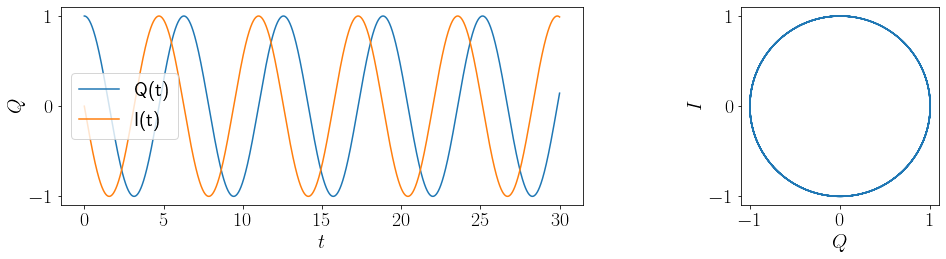

In [3]:
def f(X,t,L=1,C=1):
    Q,I=X[0],X[1]
    dQdt=I
    dIdt= -Q/(L*C)
    return np.array([dQdt,dIdt])

L=1e-3
C=1e-6
X0 = [ 1, 0 ]               # initial conditions of dependent variable 
t = np.arange ( 0, 30, 0.01) # time space

fig, axs = plt.subplots(1,2,figsize=(16,4))
s = SI.odeint(f,X0,t)
Q,I = s[:,0], s[:,1]
axs[0].plot(t,Q,label='Q(t)')
axs[0].plot(t,I,label='I(t)')
axs[0].set_xlabel(r'$t$')
axs[0].set_ylabel(r'$Q$')
axs[1].plot(Q,I)
axs[1].set_xlabel(r'$Q$')
axs[1].set_ylabel(r'$I$')
axs[1].set_aspect('equal', 'box')
fig.tight_layout()
axs[0].legend()
plt.show()

### Superposition of two SHMs acting at right angles to each other.

#### Oscillations having same frequencies.

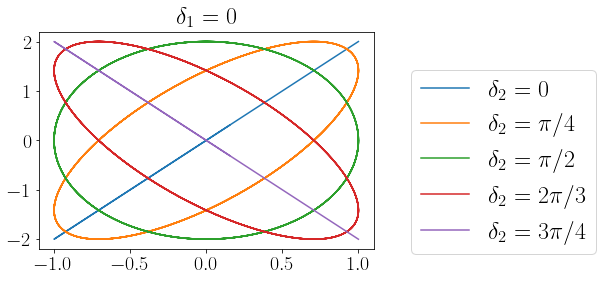

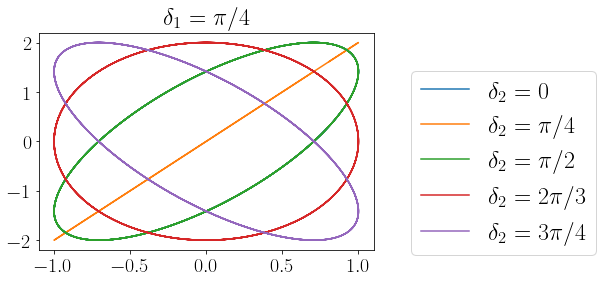

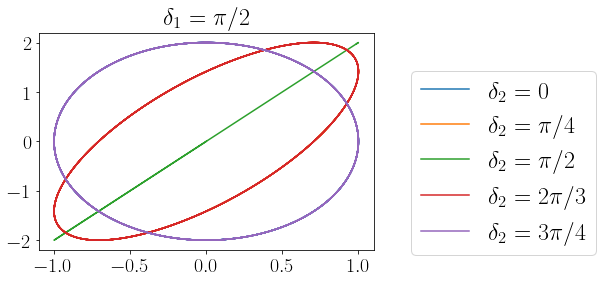

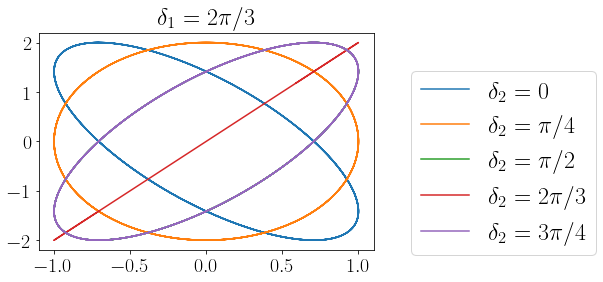

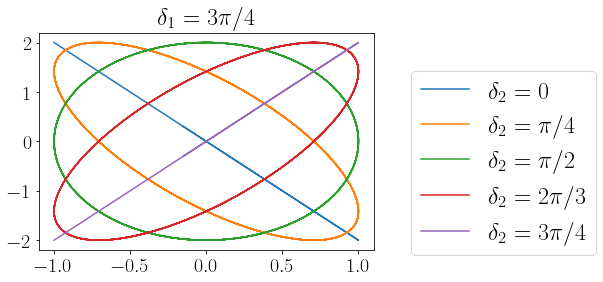

In [4]:
def fratio(t,d1,d2,w=1,a=1,b=2):
    return a*np.cos(w*t + d1),b*np.cos(w*t + d2)

t=np.arange(0,30,0.001)
pi=np.pi
d=[0.,pi/4,pi/2,3*pi/4,pi]
q=[r'$0$',r'$\pi/4$',r'$\pi/2$',r'$2\pi/3$',r'$3\pi/4$',r'$\pi$']

for d1,q1 in zip(d,q):
    for d2,q2 in zip(d,q):
        X,Y=fratio(t,d1,d2)
        plt.plot(X,Y,label=r'$\delta_2= $ '+q2)
        plt.legend(bbox_to_anchor=(1.7, 0.4),fontsize=24,loc='center right')
    plt.title(r'$\delta_1= $ ' +q1,y=1.01)
    plt.show()

#### Oscillations having slightly different frequencies ratio 1:2.

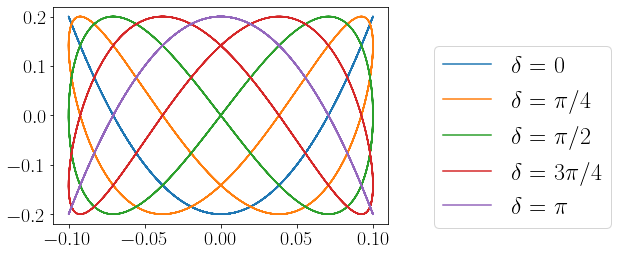

In [5]:
def fr(t,d,a=0.1,b=0.2,w=1):
    return a*np.cos(w*t),b*np.cos(2*w*t+d)

t=np.arange(0,30,0.001)
pi=np.pi
q=[r'$0$',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$']
d=[0., pi/4, pi/2, 3*pi/4, pi]

for d,q in zip(d,q):
    X,Y=fr(t,d)
    plt.plot(X,Y,label=r'$\delta= $ '+q)
plt.legend(bbox_to_anchor=(1.7, 0.4),fontsize=24,loc='center right')
plt.show()

## Damped Harmonic Oscillation

$\displaystyle{\qquad\qquad\ddot{x}+2\beta\dot{x}+\omega_0^2 x=0}$

<Figure size 1728x576 with 0 Axes>

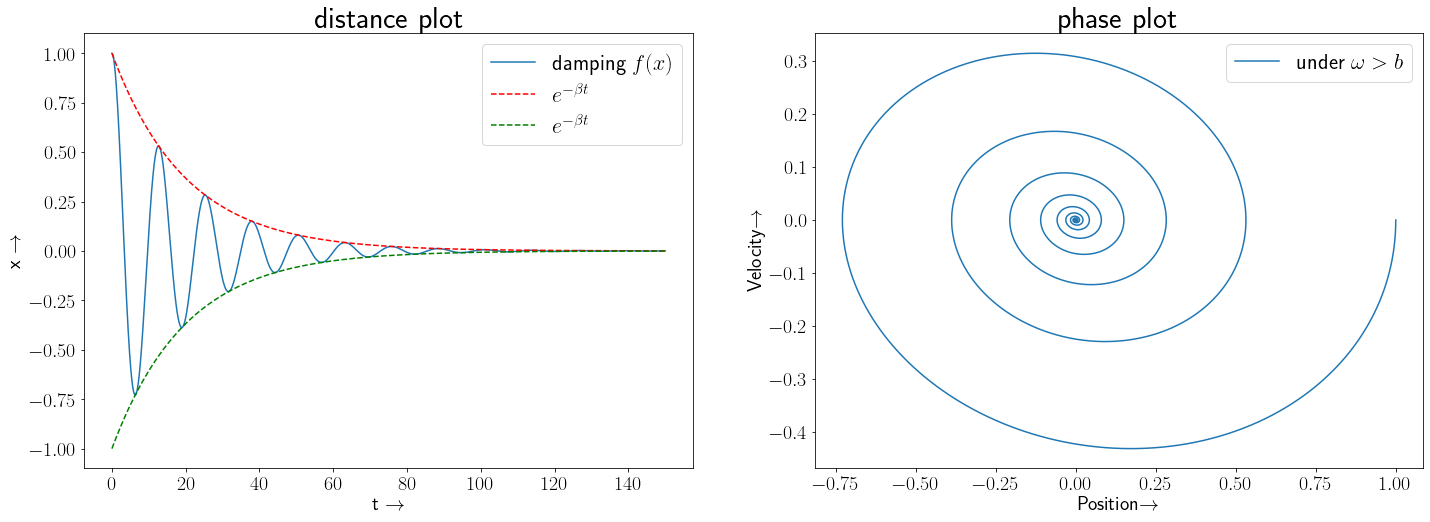

In [6]:
def f(X,t):
    x = X[0]
    v = X[1]
    dxdt = v
    dvdt = -𝜔**2*x - 2*𝛽*v
    return np.array([dxdt,dvdt])

W = [ 0.50]                  # natural angular frequency 𝜔
B = [ 0.05]                  # damping factor b
X0 = [ 1, 0 ]                # initial conditions of dependent variable 
t = np.arange ( 0, 150, 0.01) # time space

plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (24,8)
plt.suptitle("For $(\omega>b,\omega=b,\omega<b)$",fontsize=35,y=0.94)
fig, axs = plt.subplots(1,2)
for 𝜔,𝛽 in zip(W,B):
    axs[0].set_title('distance plot',fontsize=30)
    axs[0].plot(t,SIO_method(f,X0,t)[0],label=r'damping $f(x)$')
    axs[0].set_xlabel (r"t $\rightarrow$",size=20)
    axs[0].set_ylabel (r"x $\rightarrow$",size=20)
    axs[0].plot(t,np.exp(-B[0]*t),'r--',label=r'$e^{-\beta t}$')
    axs[0].plot(t,-np.exp(-B[0]*t),'g--',label=r'$e^{-\beta t}$')
    axs[0].legend(fontsize=22)
    axs[1].set_title( 'phase plot',fontsize=30)
    axs[1].plot(SIO_method(f,X0,t)[0],SIO_method(f,X0,t)[1])
    axs[1].legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    axs[1].set_xlabel(r'Position$\rightarrow$',size=20)
    axs[1].set_ylabel(r'Velocity$\rightarrow$',size=20)
plt.show()

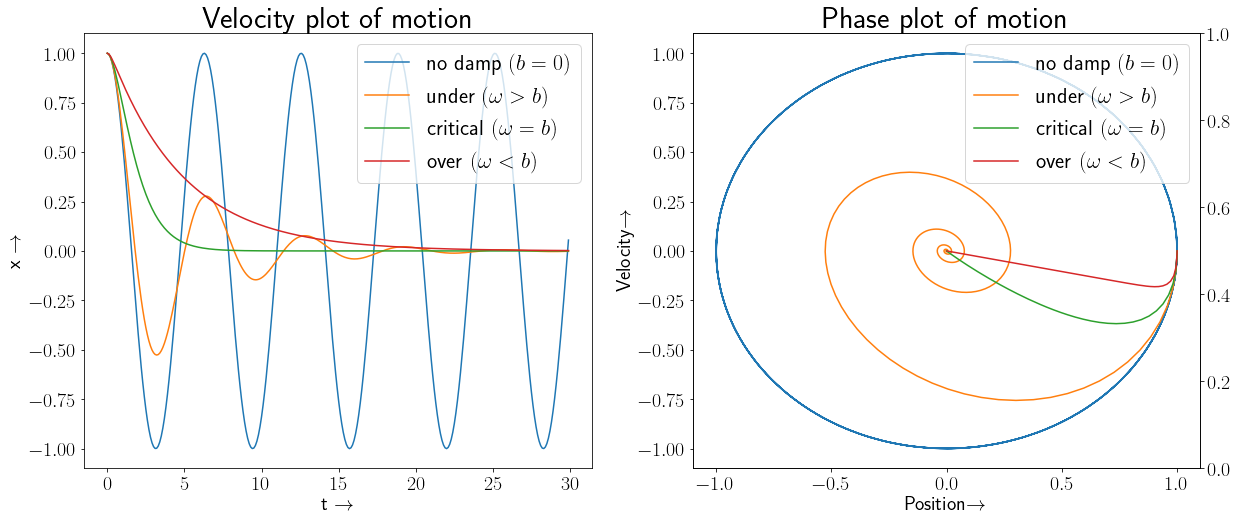

In [7]:
def f(X,t):
    x = X[0]
    v = X[1]
    dxdt = v
    dvdt = -𝜔**2*x - 2*b*v
    return np.array([dxdt,dvdt])

F0=1
W = [1.0, 1.0, 1.0, 1.0 ]       # natural angular frequency 𝜔
B = [0.0, 0.2, 1.0, 2.5 ]       # damping factor b
X0 = [ 1, 0 ]                   # initial conditions of dependent variable 
t = np.arange ( 0, 30, 0.1)     # time space

plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (20,8)
for 𝜔,b in zip(W,B):
    plt.subplot(121)
    plt.plot(t,SIO_method(f,X0,t)[0])
    plt.xlabel (r"t $\rightarrow$",size=20)
    plt.ylabel (r"x $\rightarrow$",size=20)
    plt.legend([ "no damp $(b=0)$","under $(\omega>b)$","critical $(\omega=b)$","over $(\omega<b)$"],fontsize=22)
    plt.title('Velocity plot of motion',fontsize=30)
    
    plt.subplot(122)
    plt.title('Phase plot of motion',fontsize=30)
    plt.plot(SIO_method(f,X0,t)[0],SIO_method(f,X0,t)[1])
    plt.legend([ "no damp $(b=0)$","under $(\omega>b)$","critical $(\omega=b)$","over $(\omega<b)$"],fontsize=22)
    plt.xlabel(r'Position$\rightarrow$',size=20)
    plt.ylabel(r'Velocity$\rightarrow$',size=20)
    plt.twinx()        
plt.show()

Solve **Harmonic Oscillator** with velocity proportional damping $2bv,$ and const. Force $F,m=1 :$
$$ \displaystyle{\large m\frac{\text{d}^{2}x}{\text{dt}^{2}}=m\omega^{2}F-m\omega_0^{2}x-2m\beta\frac{\text{d}x}{\text{dt}}}$$
$$ \displaystyle{=>\large \frac{\text{d}^{2}x}{\text{dt}^{2}}=\omega^{2}F-\omega_0^{2}x-2\beta\frac{\text{d}x}{\text{dt}}}$$
We solve the forced oscillator equation with constant forcing (i.e. driving frequency =0) and given initial conditions and plot the various evolutions.

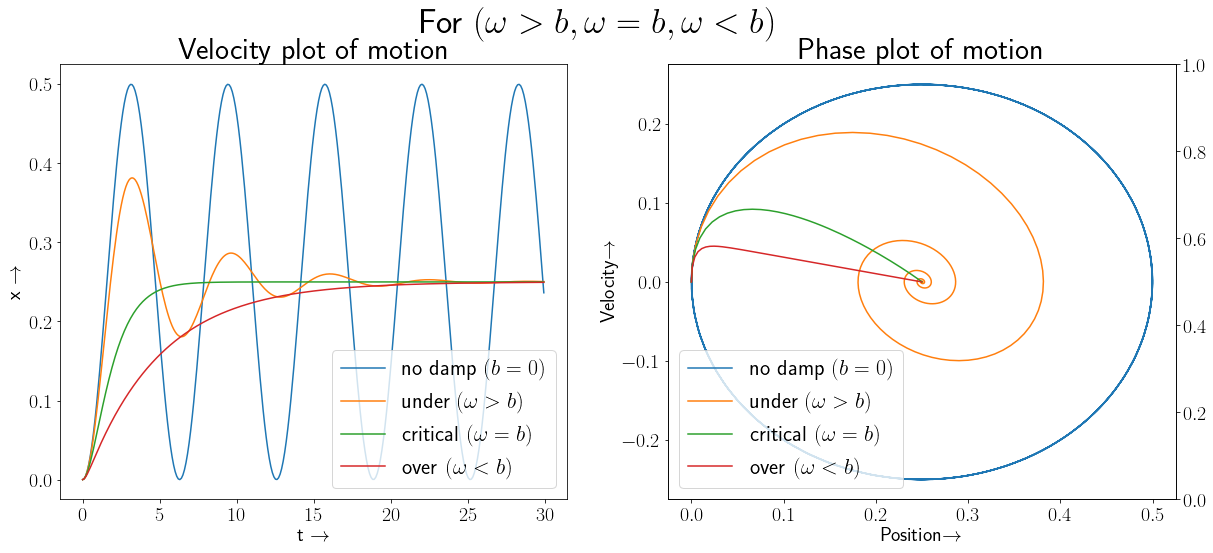

In [8]:
def f(X,t):
    x = X[0]
    v = X[1]
    𝜔=0.5*𝜔0
    dxdt = v
    dvdt = F0*𝜔**2 - 𝜔0**2*x - 2*b*v
    return np.array([dxdt,dvdt])

F0=1
W = [1.0, 1.0, 1.0, 1.0 ]       # natural angular frequency 𝜔
B = [0.0, 0.2, 1.0, 2.5 ]       # damping factor b
X0 = [ 0, 0 ]                   # initial conditions of dependent variable 
t = np.arange ( 0, 30, 0.1)     # time space

plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (20,8)
plt.suptitle("For $(\omega>b,\omega=b,\omega<b)$",fontsize=35,y=0.98)
for 𝜔0,b in zip(W,B):
    plt.subplot(121)
    plt.plot(t,SIO_method(f,X0,t)[0])
    plt.xlabel (r"t $\rightarrow$",size=20)
    plt.ylabel (r"x $\rightarrow$",size=20)
    plt.legend([ "no damp $(b=0)$","under $(\omega>b)$","critical $(\omega=b)$","over $(\omega<b)$"],fontsize=22)
    plt.title('Velocity plot of motion',fontsize=30)
    plt.subplot(122)
    plt.title('Phase plot of motion',fontsize=30)
    plt.plot(SIO_method(f,X0,t)[0],SIO_method(f,X0,t)[1])
    plt.legend([ "no damp $(b=0)$","under $(\omega>b)$","critical $(\omega=b)$","over $(\omega<b)$"],fontsize=22)
    plt.xlabel(r'Position$\rightarrow$',size=20)
    plt.ylabel(r'Velocity$\rightarrow$',size=20)
    plt.twinx()        
plt.show()

## Numerical calulation of Amplitude of 1D driven or forced oscillator :
 
 equation of motion :   $\displaystyle{ m{\frac{d^2 x}{dt^2}}+2m\beta{\frac{dx}{dt}}+kx=F \sin (\omega t)=>{\frac{d^2 x}{dt^2}}+\frac{2b}{m}{\frac{dx}{dt}}+\frac{k}{m}x= \frac{F}{m} \sin (\omega t)=>{\frac{d^2 x}{dt^2}}+\gamma{\frac{dx}{dt}}+ {\omega_o^2}x=F_o \sin (\omega t)} $
 
 so that,$\displaystyle{ {\frac{d^2 x}{dt^2}}=-\gamma{\frac{dx}{dt}}-{\omega_o^2}x+F_o \sin (\omega t)} $
 
 where $\displaystyle{\frac{k}{m}={\omega_o^2},\ \frac{F}{m}=F_o} $ and $\displaystyle{\frac{2b}{m}=\gamma},$
 constants to give resonant frequency of about $\frac{1}{s} $

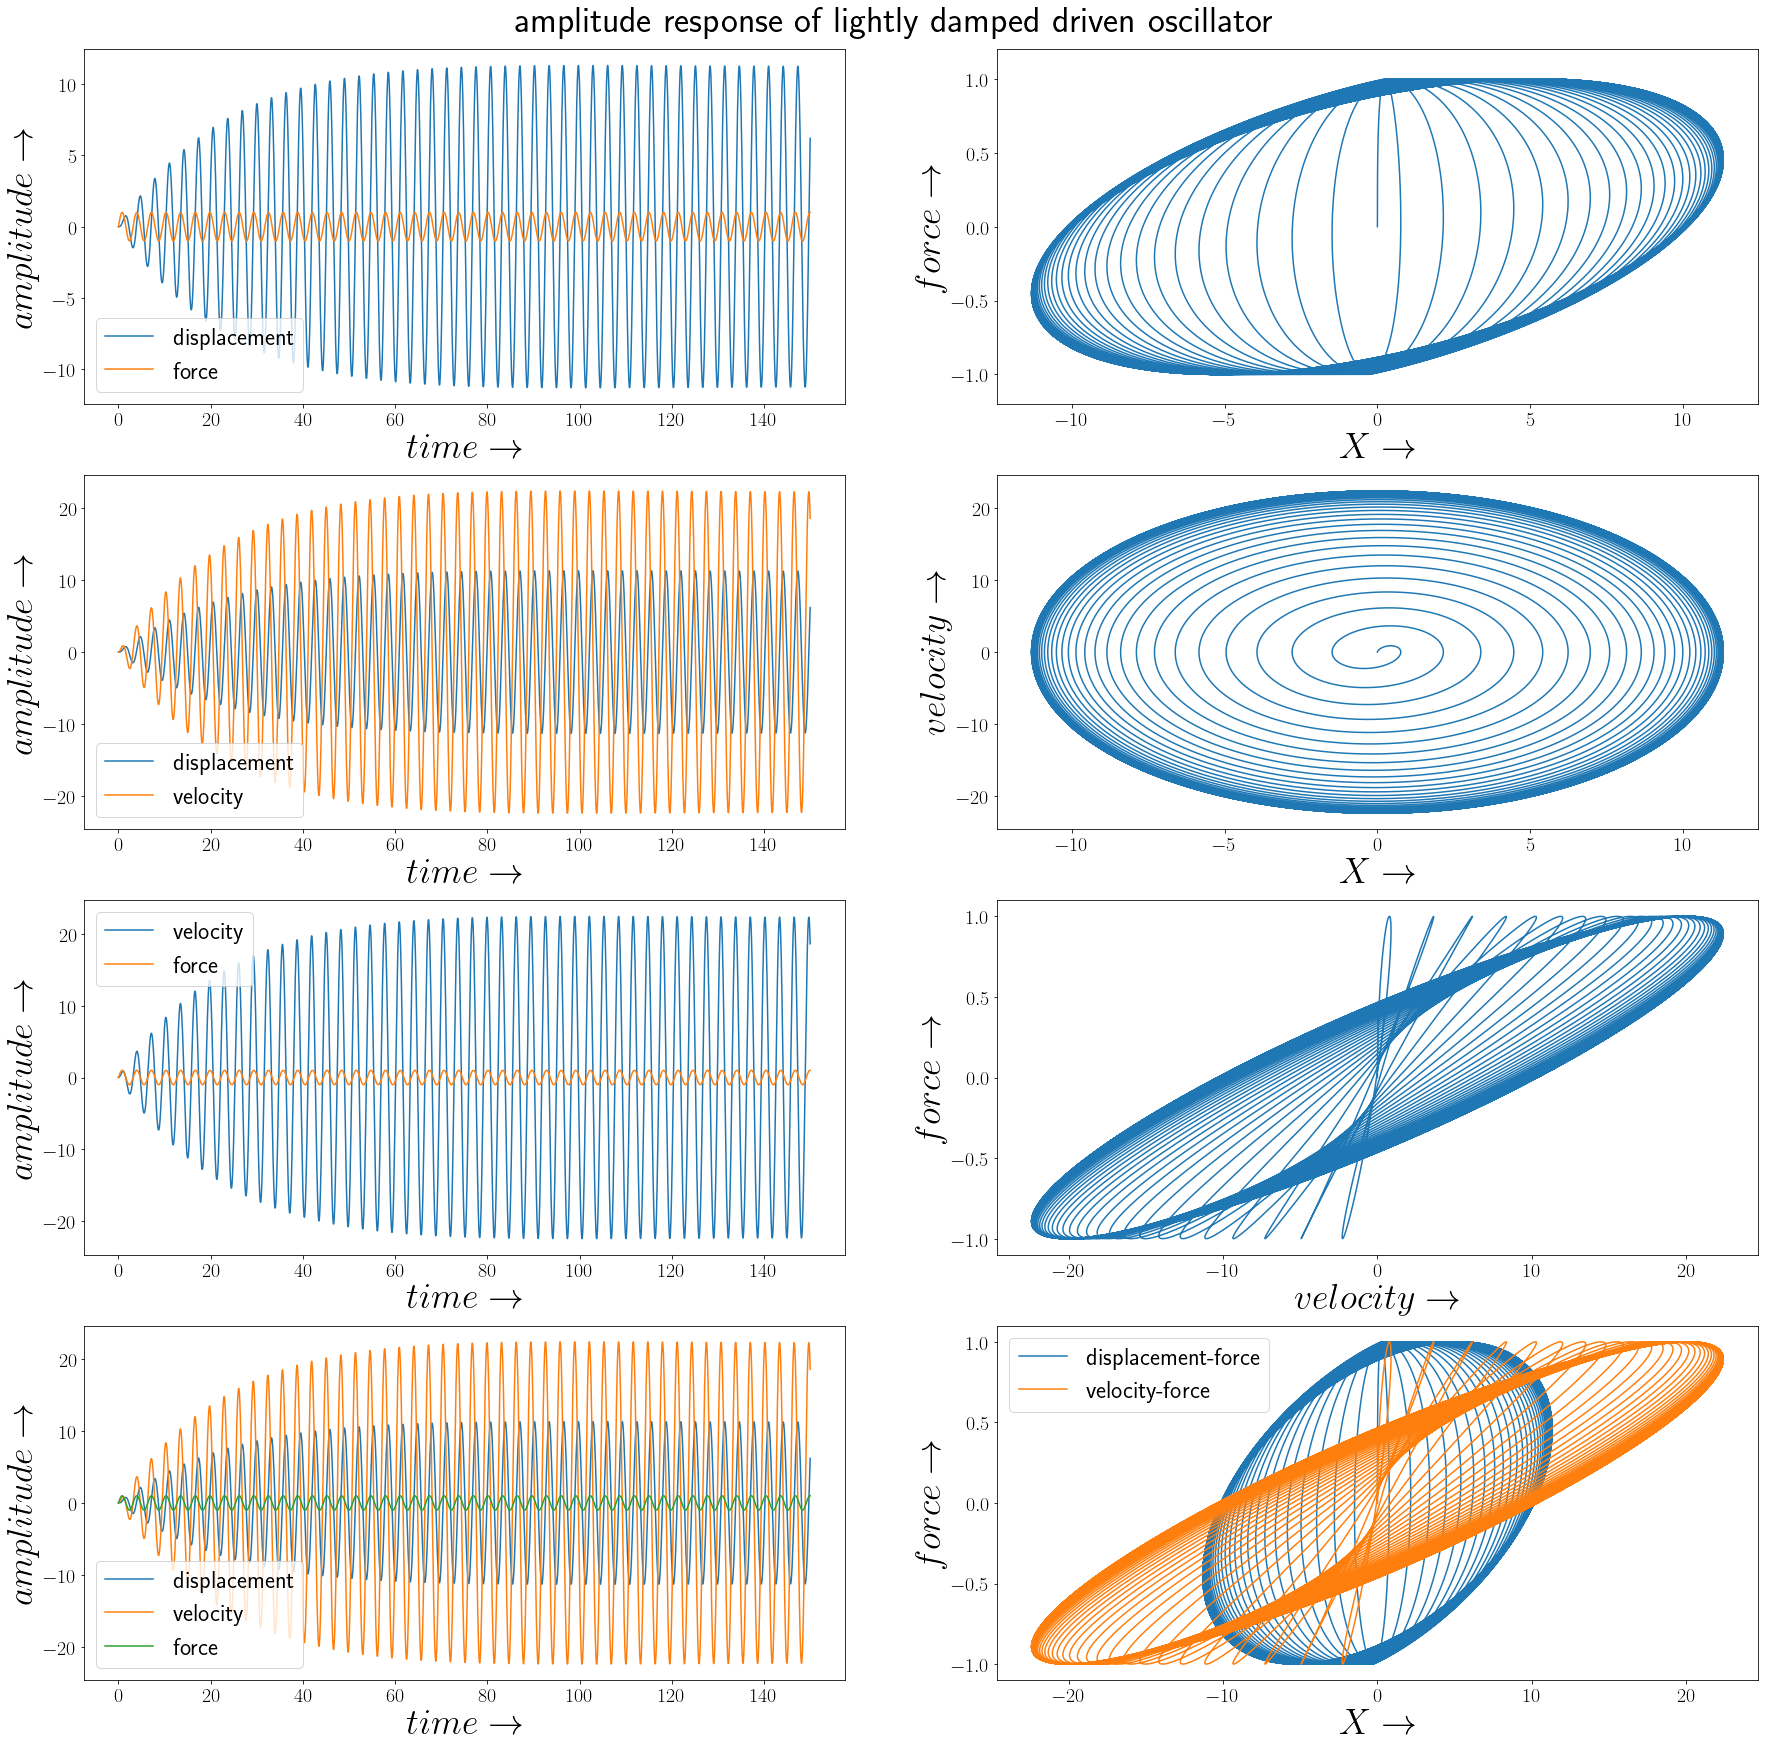

In [9]:
k = 2.0                   # resisting factor
m = 0.5                   # mass
b = 0.05                  # light damping
F = 1.0                   # Force
𝜔0 = (k/m)**0.5          
𝜔 = 0.99 * 𝜔0            
tmax = 150
dt = 0.01
t = 0
x = 0
v = 0
a = 0
X,T,Vl,FF = [0.],[0.],[0.],[0.]

while t<tmax:
    def force(x, v, t):
        return -b*v - k*x + F*np.sin(𝜔*t)
    f = force(x,v, t)
    a = f / m
    x = x + v * dt + 0.5*a *dt*dt
    v = v + a * dt
    Vl.append(v)
    FF.append(F*np.sin(𝜔*t))
    t = t + dt
    X.append(x)
    T.append(t)
    
plt.figure(figsize=(30,30))
plt.suptitle('amplitude response of lightly damped driven oscillator',fontsize=36,y=0.9)

plt.subplot(4,2,1)
plt.plot(T,X,label='displacement')
plt.plot(T, FF,label='force')
plt.legend(fontsize=24)
plt.xlabel(r'$time \rightarrow $',fontsize=36)
plt.ylabel(r'$amplitude \rightarrow $',fontsize=36)

plt.subplot(4,2,2)
plt.plot(X,FF)
plt.ylim(-1.2,1.2)
plt.xlabel(r'$X \rightarrow $',fontsize=36)
plt.ylabel(r'$force \rightarrow $',fontsize=36)

plt.subplot(4,2,3)
plt.plot(T,X,label='displacement')
plt.plot(T, Vl,label='velocity')
plt.legend(fontsize=24)
plt.xlabel(r'$time \rightarrow $',fontsize=36)
plt.ylabel(r'$amplitude \rightarrow $',fontsize=36)

plt.subplot(4,2,4)
plt.plot(X,Vl)
plt.xlabel(r'$X \rightarrow $',fontsize=36)
plt.ylabel(r'$velocity \rightarrow $',fontsize=36)

plt.subplot(4,2,5)
plt.plot(T,Vl,label='velocity')
plt.plot(T, FF,label='force')
plt.legend(fontsize=24)
plt.xlabel(r'$time \rightarrow $',fontsize=36)
plt.ylabel(r'$amplitude \rightarrow $',fontsize=36)

plt.subplot(4,2,6)
plt.plot(Vl,FF)
plt.xlabel(r'$velocity \rightarrow $',fontsize=36)
plt.ylabel(r'$force \rightarrow $',fontsize=36)

plt.subplot(4,2,7)
plt.plot(T,X,label='displacement')
plt.plot(T,Vl,label='velocity')
plt.plot(T, FF,label='force')
plt.legend(fontsize=24)
plt.xlabel(r'$time \rightarrow $',fontsize=36)
plt.ylabel(r'$amplitude \rightarrow $',fontsize=36)

plt.subplot(4,2,8)
plt.plot(X,FF,label='displacement-force')
#plt.plot(X,Vl,label='displacement-velocity')
plt.plot(Vl,FF,label='velocity-force')
plt.xlabel(r'$X \rightarrow $',fontsize=36)
plt.ylabel(r'$force \rightarrow $',fontsize=36)
plt.legend(fontsize=24)
plt.show()

### Amplitudes and phases for various damping coefficients as a function of driving frequency
amplitude ,$\displaystyle{ |\tilde{A}|=\frac{f}{\sqrt{(\omega_0^2-\omega^2)^2+4\beta^2\omega^2}}}$
<img  align="right" alt="Coding" width="900" src="https://upload.wikimedia.org/wikipedia/commons/0/07/Resonance.PNG">

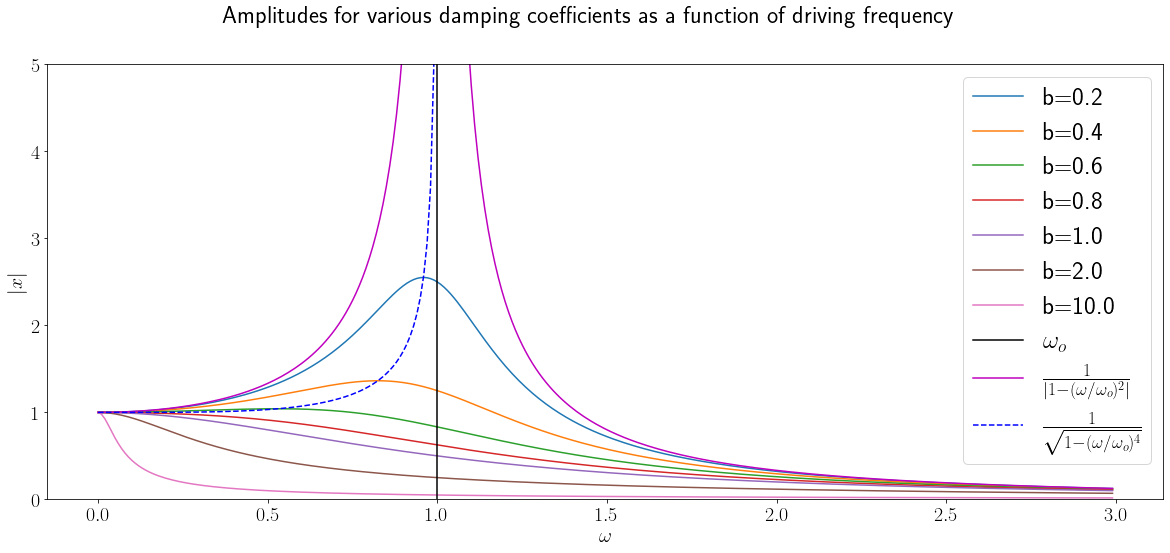

In [10]:
def mod_x(𝜔,𝜔0,f,b):
    return f/((𝜔0**2-𝜔**2)**2+(2*b*𝜔)**2)**0.5,1/((1-(𝜔/𝜔0)**2)**2)**0.5,1/(1-(𝜔/𝜔0)**4)**0.5

𝜔0,f=1.,1.
𝜔=np.arange(0,3,0.01)

for b in [0.2,0.4,0.6,0.8,1,2,10]:
    plt.plot(𝜔,mod_x(𝜔,𝜔0,f,b)[0],label='b=%0.1f'%b)
plt.axvline(𝜔0, color='black',label=r'$\omega_o$') 
plt.plot(𝜔,mod_x(𝜔,𝜔0,f,b)[1],'m-',label=r'$\frac{1}{|1-(\omega / \omega_o)^2|}$')
plt.plot(𝜔,mod_x(𝜔,𝜔0,f,b)[2],'b--',label=r'$\frac{1}{\sqrt{1-(\omega / \omega_o)^4}}$')
plt.legend(fontsize=25)
plt.ylim(0,5)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$|x|$')
plt.suptitle('Amplitudes for various damping coefficients as a function of driving frequency')
plt.show()

phase, $\displaystyle{ \phi = \tan^{-1} \Bigg( \frac{-2\beta \omega}{\omega_0^2-\omega^2}\Bigg)}$


checking the index position of "1.0" : (array([3333], dtype=int64),)


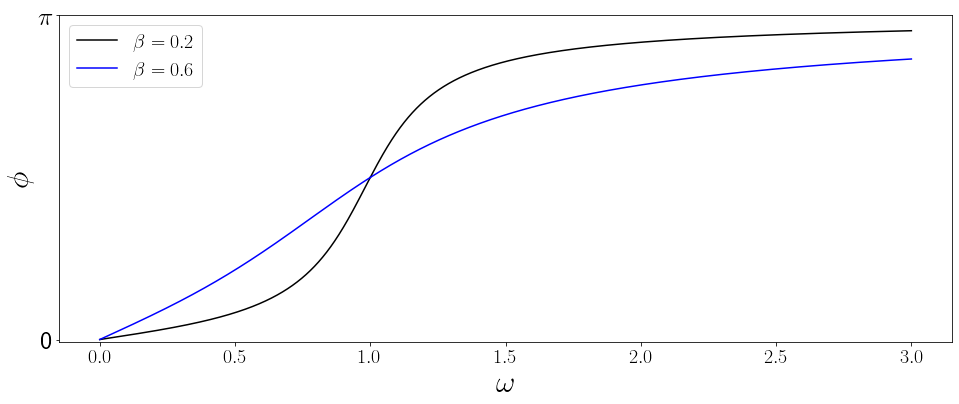

In [11]:
def phi(𝜔,𝜔0,b):
    return np.rad2deg(np.arctan(2*b*𝜔/(𝜔0**2-𝜔**2)))

𝜔0=1
𝜔=np.linspace(0,3,10000)
print('checking the index position of "1.0" :',np.where(𝜔 == 1))
c=['k','b']
b=[0.2,0.6]
fig=plt.figure(figsize = (16,6))
a = fig.add_subplot(111)
ax = gca()
for b,c in zip(b,c):
    ax.plot(𝜔[:3334],phi(𝜔,𝜔0,b)[:3334],c,label=r'$\beta=%1.1f$'%b)
    ax.plot(𝜔[3334:],180+phi(𝜔,𝜔0,b)[3334:],c)
    ylim(-1.1, 1.1*phi(𝜔,𝜔0,b).max())
    yticks([0,180],[0,r'$\pi$'], fontsize=26)
    ylabel('$\phi$', fontsize=30)
    xlabel('$\omega$', fontsize=30)
    ax.legend()
plt.show()

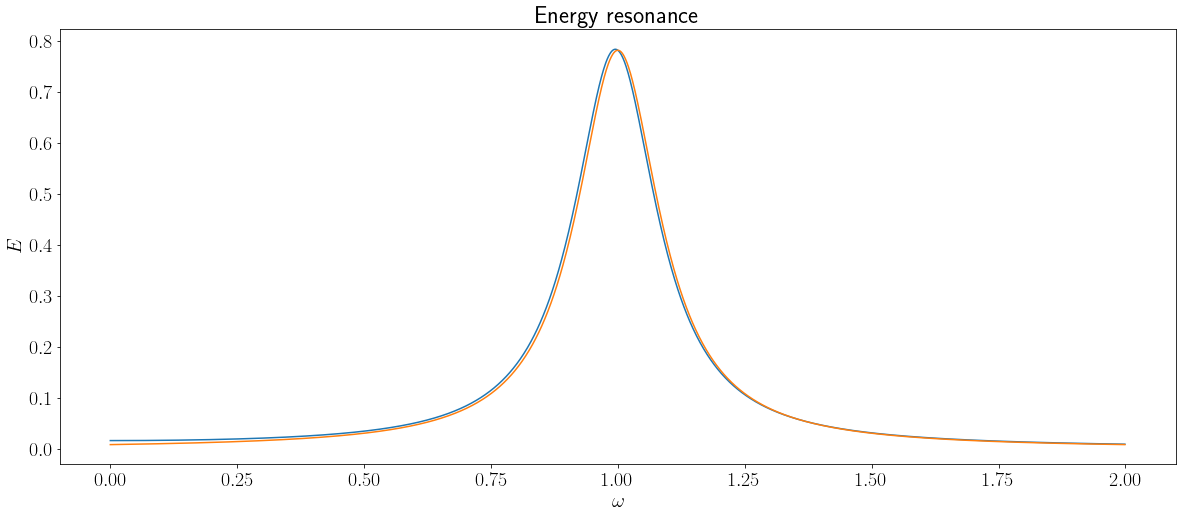

In [12]:
def E(𝜔,𝜔0=1,b=0.1,f=0.25):
    return (m*f**2/4)*(𝜔**2+𝜔0**2)/((𝜔0**2-𝜔**2)**2+(2*b*𝜔)**2)

def Emax(𝜔,k=1,𝜔0=1,b=0.1,f=0.25):
    return k*f**2/(8*𝜔0**2*((𝜔0-𝜔)**2+b**2))

m=1
b=0.1
𝜔=.9
f=1
𝜔=np.arange(0,2,0.001)
plt.plot(𝜔,E(𝜔))
plt.plot(𝜔,Emax(𝜔))
#plt.axhline(0)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$E$')
plt.title('Energy resonance')
plt.show()

We finally consider the power drawn by the oscillator from the external force.                                             
The instantaneous power $P(t) = F(t)\dot{x}(t)$ has a value

$\displaystyle{\qquad\quad P(t)=[F\cos(\omega t)][-|\tilde{x}|\omega\sin(\omega t+\phi)]}$

The average power is the quantity of interest, we study this as a function of the frequency.                     
Calculating this we have

$\displaystyle{\qquad\quad<P>(\omega)=-\frac{1}{2}\omega F |\tilde{x}|\sin\phi}$

but we know,

$\displaystyle{\qquad\quad|\tilde{x}|\sin\phi = \frac{-2\beta\omega}{(\omega_0^2-\omega^2)^2+4\beta^2\omega^2} \Bigg(\frac{F^2}{m}\Bigg)}$

which gives the average power

$\displaystyle{\qquad\quad<P>(\omega)=\frac{\beta\omega}{(\omega_0^2-\omega^2)^2+4\beta^2\omega^2} \Bigg(\frac{F^2}{m}\Bigg)}$

Here again, a prominent, sharp peak is seen only if $\beta\ll\omega_0$.
In the mild damping limit, in the vicinity of the maxima we have

$\displaystyle{\qquad\quad<P>(\omega)\approx\frac{\beta\omega}{(\omega_0-\omega)^2+\beta^2} \Bigg(\frac{F^2}{4m}\Bigg)}$ which again is a Lorentzian proile.


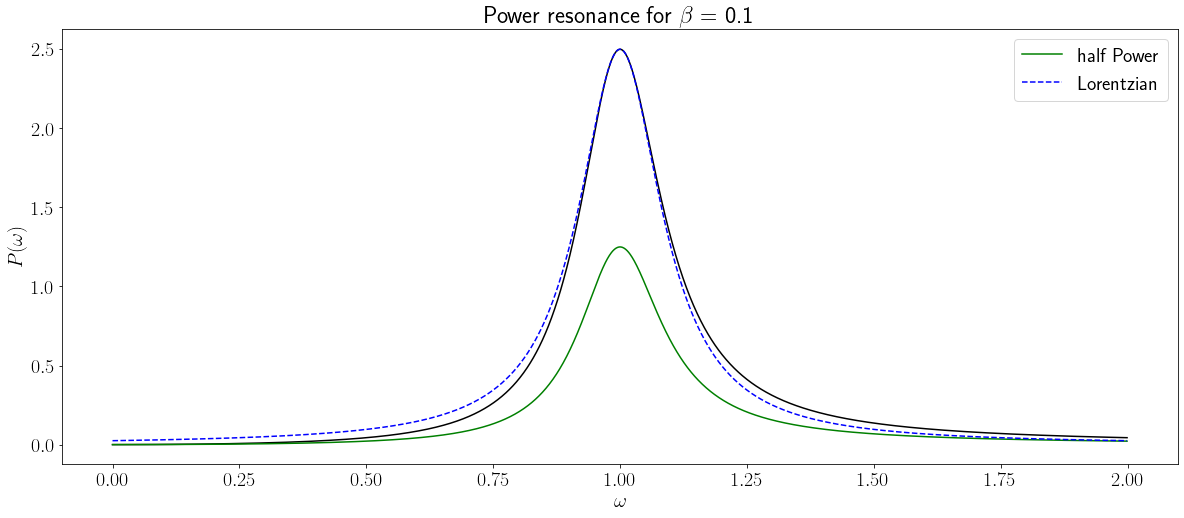

In [13]:
def P(w):    
    return (b*w*w/((w0*w0-w*w)**2+(2*b*w)**2))*(f*f*m)

def PL(w):    
    return (b/((w0-w)**2+(b)**2))*(f*f*m/4)

m=1
b=0.1
w0=1
f=1
w=np.arange(0,2,0.001)

plt.plot(w,P(w),'k')
plt.plot(w,P(w)/2,'g',label='half Power')
plt.plot(w,PL(w),'b--',label='Lorentzian')
plt.legend()
plt.xlabel(r'$\omega$')
plt.ylabel(r'$P(\omega)$')
plt.title(r'Power resonance for $\beta = $ %0.1f'%b)
plt.show()

 Plot the response, x(t), of a forced oscillator with a forcing $3 cos 2t$ and natural frequency $ω_0 = 3$ Hz with initial conditions, $x(0) = 3$ and $ \dot{x} (0) = 0,$                                                                           
 for two different resistances, $β = 1$ and $β = 0.5$. 

 Plot also for fixed resistance, $β = 0.5$ and different forcing amplitudes $f_0$ = 1, 3, 5 and 9.
$$ \displaystyle{ \frac{\text{d}^{2}x}{\text{dt}^{2}}=f_o\cos\omega t-\omega_o^{2}x-2b\frac{\text{d}x}{\text{dt}}}$$

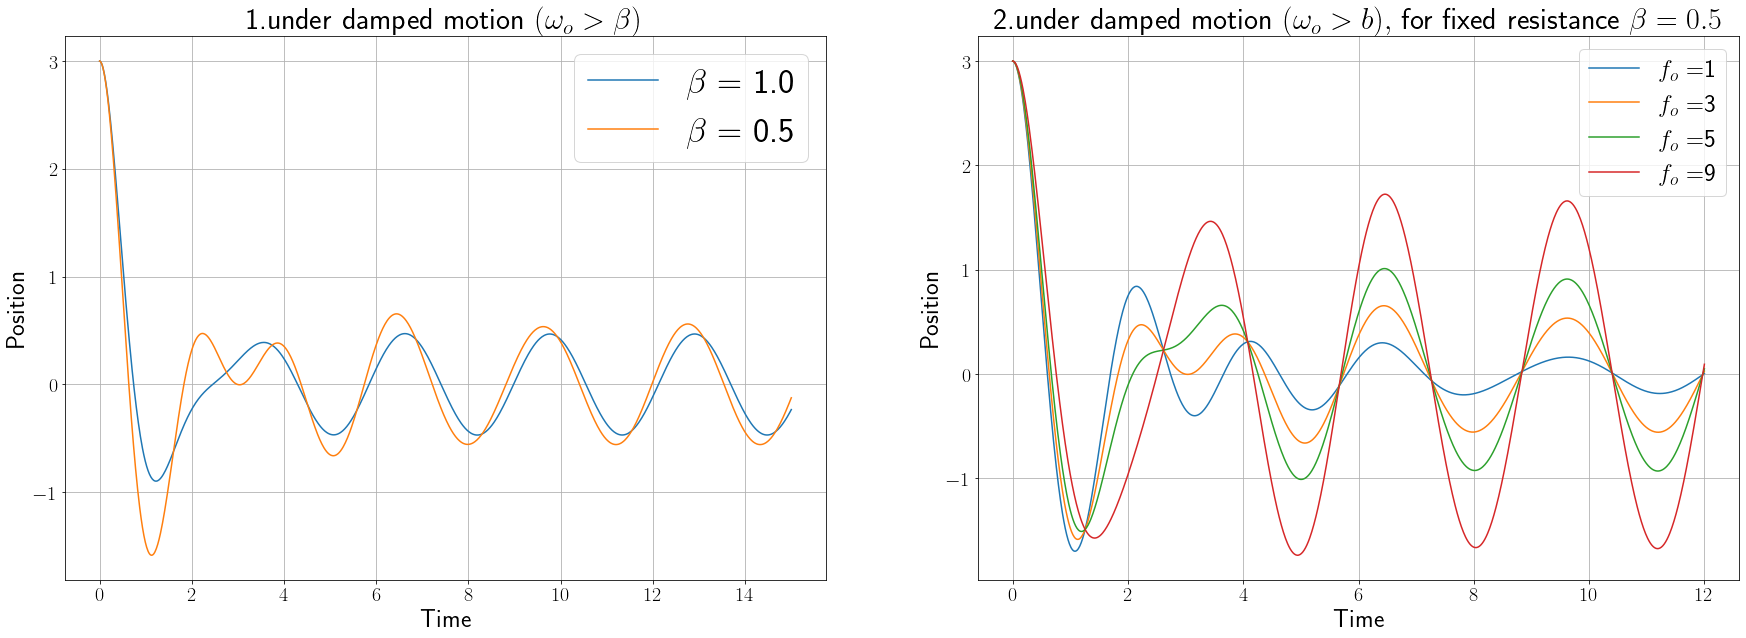

In [14]:
def f(X,t):
    x,v=X[0],X[1]
    dxdt=v
    dvdt= -2*b*v-w0**2*x+f0*np.cos(w*t)
    return np.array([dxdt,dvdt])

plt.figure(figsize=(30,10))
w0=3
w=2
f0=3
X0 = [3,0]
t = np.linspace (0,15,1000)

plt.subplot(1,2,1)
for b in [1,0.5]:
    s = SI.odeint(f,X0,t)
    x,v = s[:,0],s[:,1]
    plt.plot(t,x,label=r'$ \beta =$ %0.1f'%b)
plt.legend(fontsize=35)
plt.grid()
plt.title(r"1.under damped motion $(\omega_o> \beta)$",fontsize=30)
plt.xlabel ("Time",size=25)
plt.ylabel ("Position",size=25)

plt.subplot(1,2,2)
b=0.5
t = np.linspace (0,12,1000)
for f0 in [1,3,5,9]:
    s = SI.odeint(f,X0,t)
    x,v = s[:,0],s[:,1]
    plt.plot(t,x,label='$f_o = $%i'%f0)
plt.grid()
plt.title(r"2.under damped motion  $(\omega_o>b),$ for fixed resistance $\beta=0.5$ ",fontsize=30)
plt.xlabel ("Time",size=25)
plt.ylabel ("Position",size=25)
plt.legend(fontsize=25)
plt.show()

### A galvanometer is connected with a constant-current source through a switch.                                               
At time $t=0,$ the switch is closed. After some time the galvanometer deflection reaches its final value $\theta_{max}$.   
Taking damping torque proportional to the angular velocity draw deflection of the galvanometer from the initial position of rest                                                                                                                       
(i.e. $ \theta = 0, \dot{\theta} = 0$) to its final position $\theta = \theta_{max}$, for the underdamped, critically damped and overdamped cases. 

Solve **Harmonic Oscillator** with velocity proportional damping $2bv,$ and const. Force $F_o,m=1 :$
$$ \displaystyle{\large m\frac{\text{d}^{2}x}{\text{dt}^{2}}=-m\omega^{2}(x-F_0)-2mb\frac{\text{d}x}{\text{dt}}}$$
$$ \displaystyle{=>\large \frac{\text{d}^{2}x}{\text{dt}^{2}}=-\omega^{2}(x-F_0)-2b\frac{\text{d}x}{\text{dt}}}$$
We solve the forced oscillator equation with constant forcing (i.e. driving frequency =0) and given initial conditions and plot the various evolutions.                                                                                               
Figure  shows the galvanometer deflection as a function of time for some arbitrary values of $\theta_{max}$, damping coefficient and natural frequency.

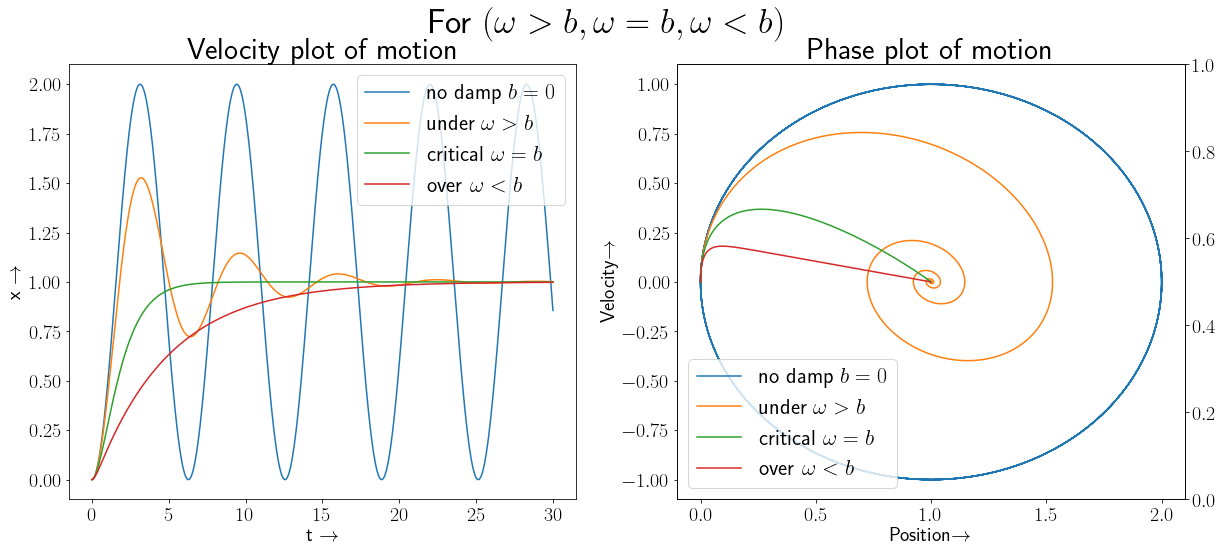

In [15]:
def f(X,t):
    x = X[0]
    v = X[1]
    dxdt = v
    dvdt = -w**2*(x-F0) - 2*b*v
    return np.array([dxdt,dvdt])

F0=1
W = [1.0, 1.0, 1.0, 1.0 ]       # natural angular frequency 𝜔
B = [0.0, 0.2, 1.0, 2.5 ]       # damping factor b
X0 = [ 0, 0 ]                   # initial conditions of dependent variable 
t = np.arange ( 0, 30, 0.01)     # time space

plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (20,8)
plt.suptitle("For $(\omega>b,\omega=b,\omega<b)$",fontsize=35,y=0.98)
for w,b in zip(W,B):
    plt.subplot(121)
    plt.plot(t,SIO_method(f,X0,t)[0])
    plt.xlabel (r"t $\rightarrow$",size=20)
    plt.ylabel (r"x $\rightarrow$",size=20)
    plt.legend([ "no damp $b=0$","under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.title('Velocity plot of motion',fontsize=30)
    
    plt.subplot(122)
    plt.title('Phase plot of motion',fontsize=30)
    plt.plot(SIO_method(f,X0,t)[0],SIO_method(f,X0,t)[1])
    plt.legend(["no damp $b=0$","under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.xlabel(r'Position$\rightarrow$',size=20)
    plt.ylabel(r'Velocity$\rightarrow$',size=20)
    plt.twinx()        
plt.show()

# $$\textbf{Coupled Oscillation}$$

## $\textbf{Two Pendulums Coupled by a Springs}$

A system of two identical pendulums each having a mass $m$ and length $l$, coupled by a light spring of stiffness $k$ whose natural length                                                                                                         
equals the distance between the masses in equilibrium. Let $x_1$ and $x_2$ be the displacement of the masses A and B at any instant of time $t$.                                   
If $x_2>x_1$ then the spring is extended and the tension $k(x_2-x_1)$ in the spring will act in favour of the accleration $ \ddot{x}_1$ of A but against the accleration $ \ddot{x}_2$ of B.                                                           

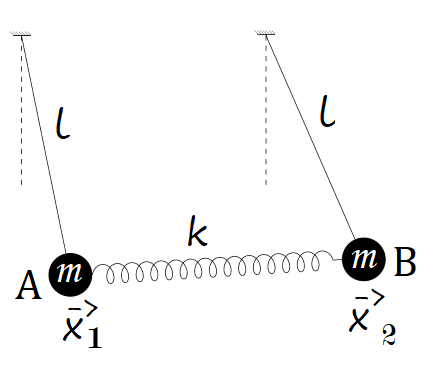

So the equations of motion of A and B can be written as :
$$m\ddot{x}_1=-\frac{mg}{l}x_1+k(x_2-x_1)=>\ddot{x}_1=-\frac{g}{l}x_1+\frac{k}{m}(x_2-x_1)$$

$$m\ddot{x}_2=-\frac{mg}{l}x_2-k(x_2-x_1)=>\ddot{x}_2=-\frac{g}{l}x_2-\frac{k}{m}(x_2-x_1)$$

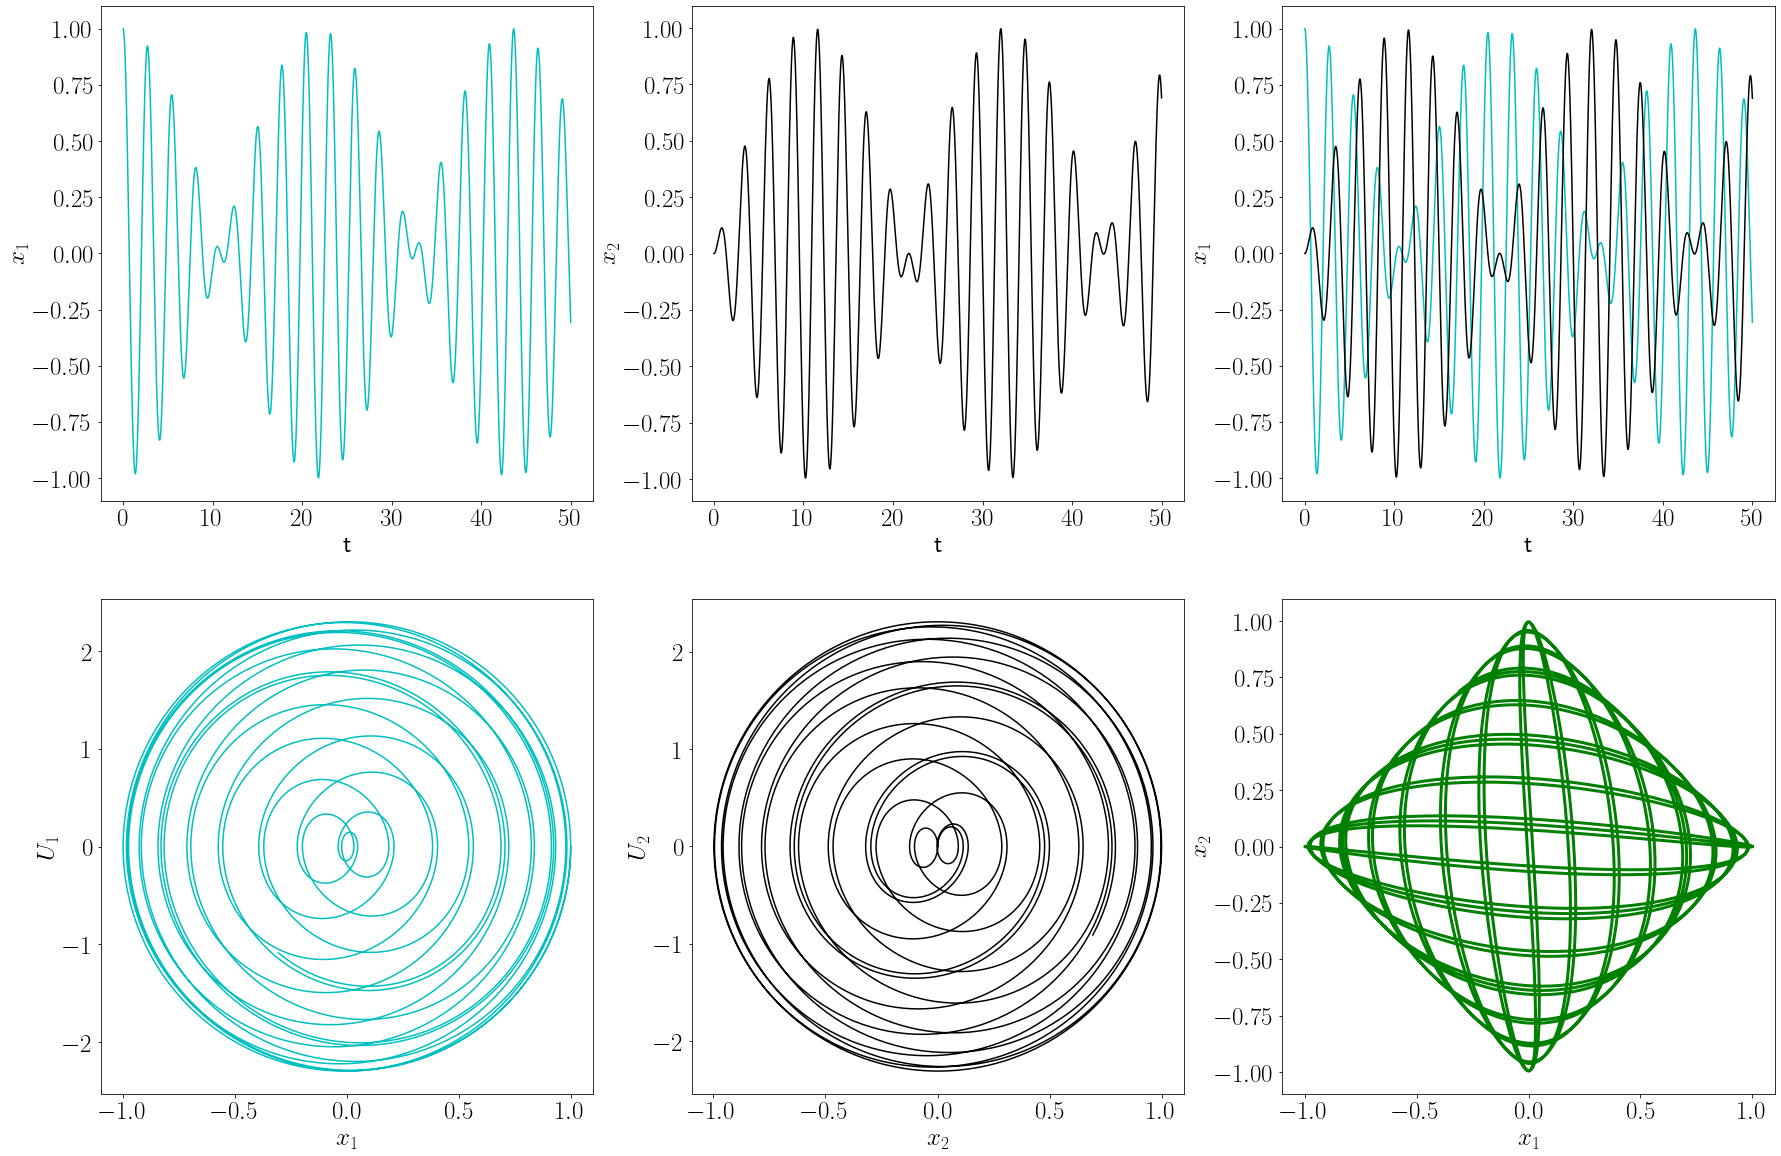

In [16]:
def f(X,t):
    x1,v1,x2,v2=X[0],X[1],X[2],X[3]
    dx1dt=v1
    dx2dt=v2
    dv1dt= -(g/l)*x1 + k*(x2-x1)/m
    dv2dt= -(g/l)*x2 - k*(x2-x1)/m
    return np.array([dx1dt,dv1dt,dx2dt,dv2dt])

X0 = [ 1, 0, 0.0, 0 ]               # initial conditions of dependent variable 
t = np.arange ( 0, 50, 0.01) # time space
l = 2.1
g = 9.8
m = 0.3
k = 0.2

plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams['font.size'] = 25
fig, axs = plt.subplots(2,3)
s = SI.odeint(f,X0,t)
X1,U1,X2,U2 = s[:,0], s[:,1], s[:,2], s[:,3]
axs[0][0].plot(t,X1,'c-',label='X1')
axs[0][0].set_xlabel('t')
axs[0][0].set_ylabel('$x_1$')
axs[0][1].plot(t,X2,'k-',label='X2')
axs[0][1].set_xlabel('t')
axs[0][1].set_ylabel('$x_2$')
axs[0][2].plot(t,X1,'c-',label='X1')
axs[0][2].plot(t,X2,'k-',label='X2')
axs[0][2].set_xlabel('t')
axs[0][2].set_ylabel('$x_1$')
axs[1][0].plot(X1,U1,'c-',label='X1')
axs[1][0].set_xlabel('$x_1$')
axs[1][0].set_ylabel('$U_1$')
axs[1][1].plot(X2,U2,'k-',label='X2')
axs[1][1].set_xlabel('$x_2$')
axs[1][1].set_ylabel('$U_2$')
axs[1][2].plot(X1,X2,'g-',label='ODE',linewidth=3)
axs[1][2].set_xlabel('$x_1$')
axs[1][2].set_ylabel('$x_2$')
plt.show()

## $\textbf{Two Masses Coupled by Three Springs}$
This is a stiffness coupled system consisting of two masses $m_1$ and $m_2$ connected by three massless springs of    
spring constants $k_1,k_2,k$ that is capable of longitudinal oscillation on a smooth horizontal surface as in the figure ...

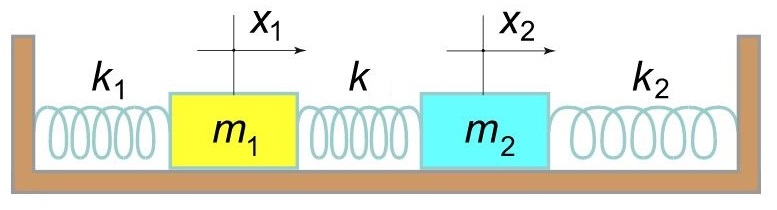

Let at any instant of time $t$ the displacement of the masses $m_1$ and $m_2$ from their equilibrium position be $x_1$ and $x_2$ respectively.                                                                                                        
If $x_2>x_1$ then the spring k is extended and the tension $k(x_2-x_1)$ in the spring will act in favour of the accleration $\ddot{x_1}$ of $m_1$                                                                                                    
but against the accleration $\ddot{x_2}$ of $m_2$. So the equations of motion of $m_1$ and $m_2$ is written as:
$$ m_1\ddot{x_1}=k_1x_1+k(x_2-x_1)=>\ddot{x_1}=\frac{k}{m_1}x_2 - \frac{(k_1+k)}{m_1}x_1$$

$$ m_2\ddot{x_2}=k_2x_2-k(x_2-x_1)=>\ddot{x_2}=\frac{k}{m_2}x_1 - \frac{(k_2+k)}{m_2}x_2$$

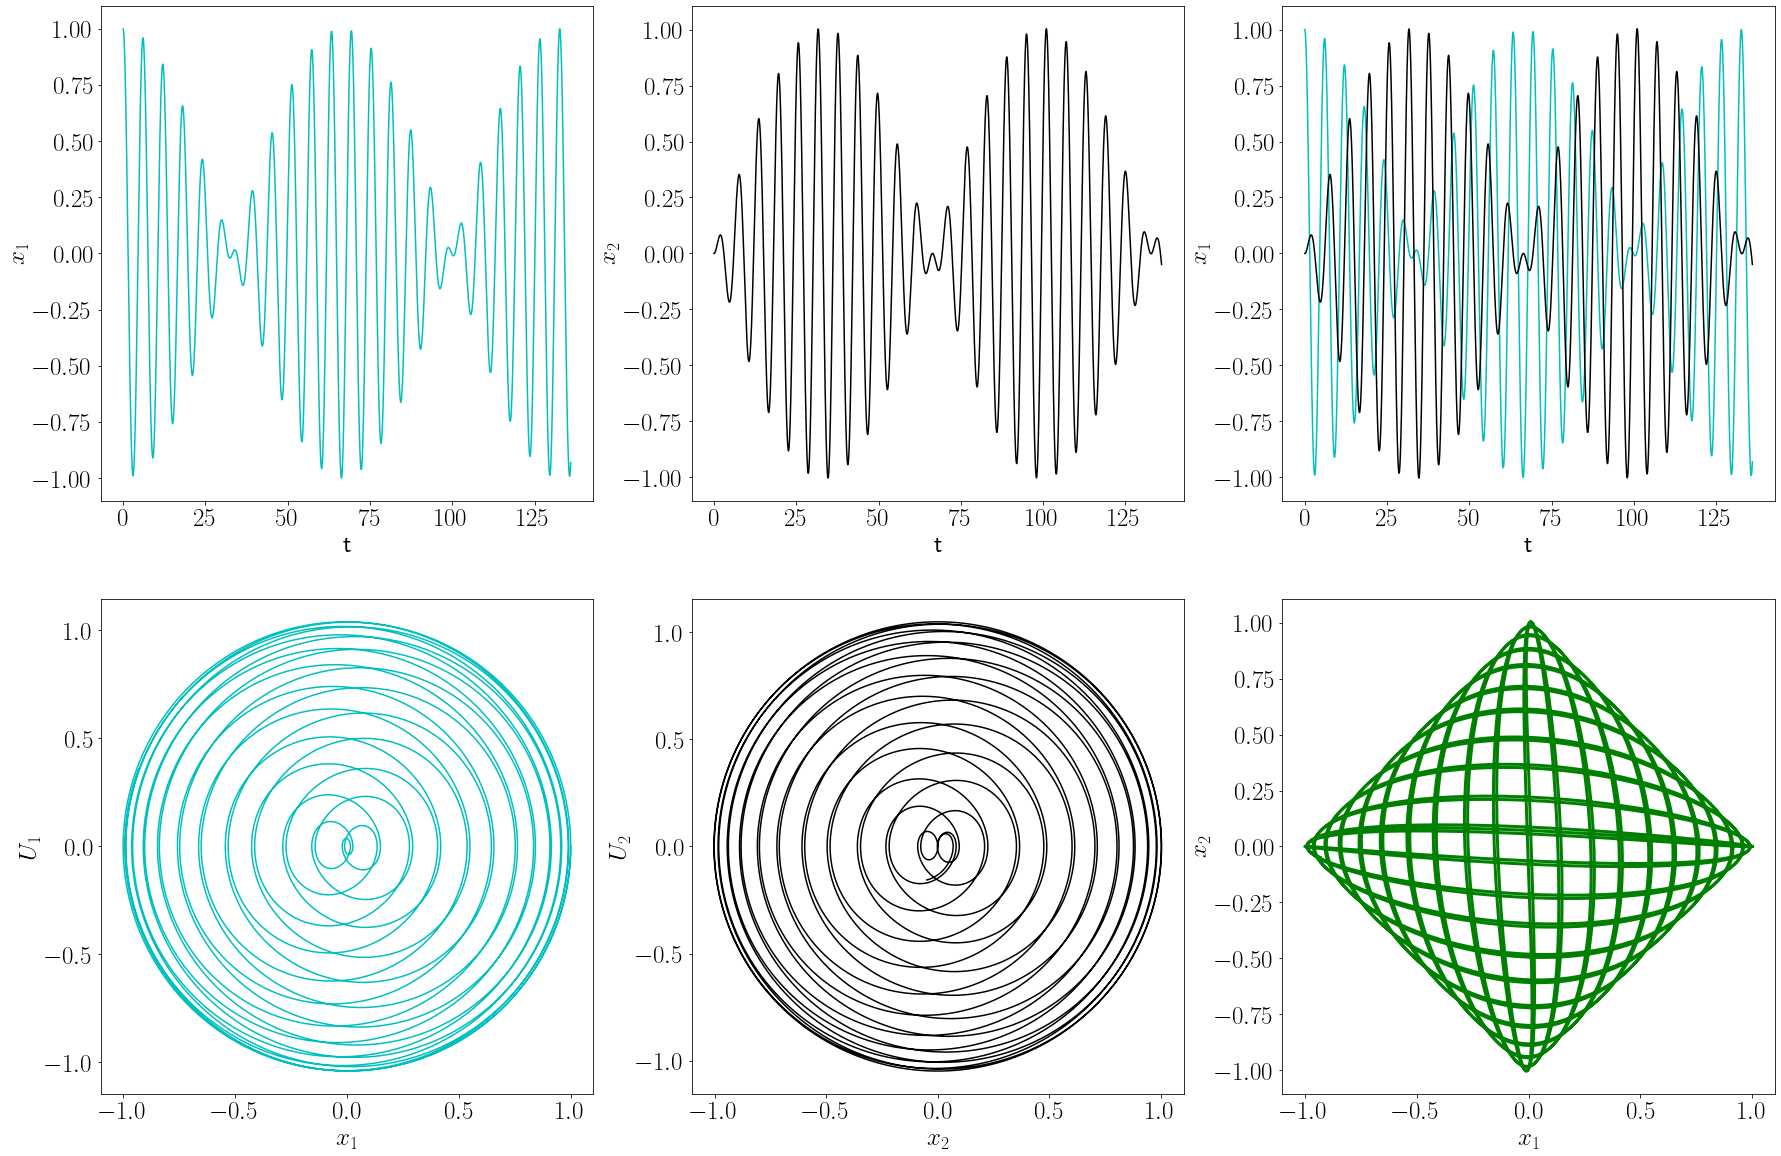

In [17]:
def f(X,t):
    x1,v1,x2,v2=X[0],X[1],X[2],X[3]
    dx1dt=v1
    dx2dt=v2
    dv1dt = (k*x2 - (k1+k)*x1)/m1 
    dv2dt = (k*x1 - (k2+k)*x2)/m2 
    return np.array([dx1dt,dv1dt,dx2dt,dv2dt])

k1=1.01
k2=1.0
k=0.10
m1=1.021
m2=1.01
X0 = [ 1, 0, 0., 0 ]               # initial conditions of dependent variable 
t = np.arange ( 0, 136, 0.001)     # time space
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams['font.size'] = 25
fig, axs = plt.subplots(2,3)
s = SI.odeint(f,X0,t)
X1,U1,X2,U2 = s[:,0], s[:,1], s[:,2], s[:,3]
axs[0][0].plot(t,X1,'c-',label='X1')
axs[0][0].set_xlabel('t')
axs[0][0].set_ylabel('$x_1$')
axs[0][1].plot(t,X2,'k-',label='X2')
axs[0][1].set_xlabel('t')
axs[0][1].set_ylabel('$x_2$')
axs[0][2].plot(t,X1,'c-',label='X1')
axs[0][2].plot(t,X2,'k-',label='X2')
axs[0][2].set_xlabel('t')
axs[0][2].set_ylabel('$x_1$')
axs[1][0].plot(X1,U1,'c-',label='X1')
axs[1][0].set_xlabel('$x_1$')
axs[1][0].set_ylabel('$U_1$')
axs[1][1].plot(X2,U2,'k-',label='X2')
axs[1][1].set_xlabel('$x_2$')
axs[1][1].set_ylabel('$U_2$')
axs[1][2].plot(X1,X2,'g-',label='ODE',linewidth=3)
axs[1][2].set_xlabel('$x_1$')
axs[1][2].set_ylabel('$x_2$')
plt.show()